___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://i.pinimg.com/originals/ae/33/8d/ae338de027b612e468cf631694dcca7e.jpg" width="500px" height="100px" />


# Clase 7

El objetivo con esta sesión es entender las nociones básicas y metodología, para realizar una simulación de algún proceso de nuestra vida cotidiana o profesional. 

## Etapas para realizar un estudio de simulación

> - *Definición del sistema*: determinar la interacción del sistema con otros sistemas, restricciones, interacción e interrelación de variables de interés y los resultados esperados.
> - *Formulación de un modelo*: Es necesario definir todas las variables que forman parte del sistema y además definir un diagrama de flujo que describa la forma completa del modelo.
> - *Colección de datos*: Definir los datos necesarios para el modelo. Datos pueden provenir de registros contables, órdenes de trabajo, órdenes de compra, opiniones de expertos y si no hay otro remedio por experimentación.
> - *Validación*: En esta etapa es posible detectar deficiencias en la formulación del modelo o en los datos sumunistrados al modelo. Formas de validar un modelo son:
    - Opinión de expertos.
    - Exactitud con que se predicen datos hitóricos.
    - Exactitud de la predicción del futuro.
    - La aceptación y confianza en el modelo de la persona que hará uso de los resultados que arroje el experimento de simulación.
    
> - *Experimentación*: La experimentación con el modelo se realiza después de que éste ha sido validado. La experimentación consiste en generar los datos deseados y en realizar el análisis de sensibilidad de los índices requeridos.
> - *Interpretación*: Se interpretan los resultados que arroja la simulación y en base a esto se toma una decisión.
> - *Documentación*: 
    - Datos que debe de tener el modelo
    - Manual de usurario
        

# Casos positivos Covid-19 [fuente](https://ourworldindata.org/coronavirus-source-data)

In [1]:
# Importación de paquetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as st

In [37]:
# Leer los datos del archivo covid_cases y quedarse únicamente con los datos de méxico
data = pd.read_csv('covid_cases.csv')


,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-02-28,MEX,North America,Mexico,1.0,1.0,NaN,NaN,NaN,NaN,0.008,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779
2020-02-29,MEX,North America,Mexico,4.0,3.0,NaN,NaN,NaN,NaN,0.031,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779
2020-03-01,MEX,North America,Mexico,5.0,1.0,NaN,NaN,NaN,NaN,0.039,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779
2020-03-02,MEX,North America,Mexico,5.0,0.0,NaN,NaN,NaN,NaN,0.039,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779
2020-03-03,MEX,North America,Mexico,5.0,0.0,NaN,NaN,NaN,NaN,0.039,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779


<AxesSubplot:xlabel='date'>

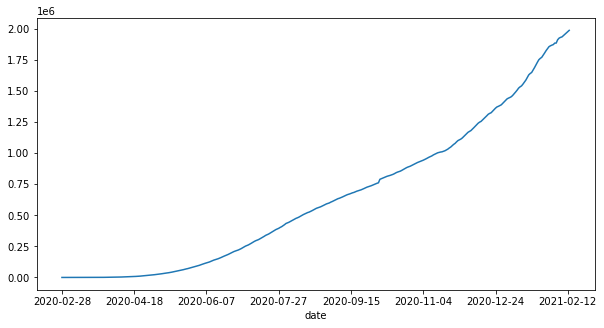

In [25]:
# Seleccionar únicamente los casos totales y graficarlos


<AxesSubplot:>

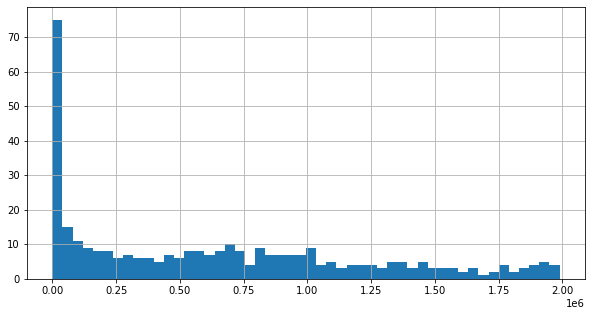

In [31]:
# Analizar los datos en el dominio de la frecuencia (histograma)


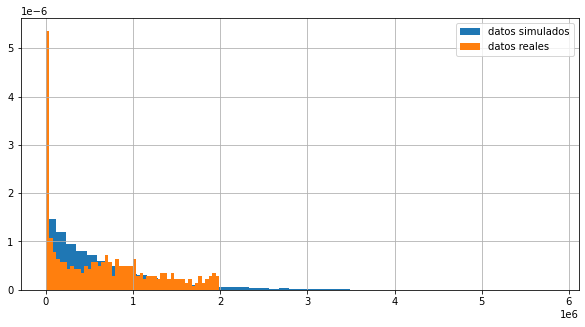

In [73]:
# Analizar el help de la función st.expon (paŕametros y método rvs)
# Generar 10**4 valores aleatorios de dicha distribución y luego comparar
# el histograma de los datos reales con los datos simulados



## ¿Cómo usaríamos montecarlo para saber en un futuro cuantas personas es probable que se infecten?

In [76]:
escenarios, fecha_futura = 10000, 7


array([ 640374.5527827 , 1281587.28661897, 1927367.46361889,
       2564687.70902269, 3201859.70534247, 3841100.11398707,
       4472371.97891696])

# Simular dado cargado

Suponga que tenemos un dado cargado que distribuye según un distribución de probabilidad binomial con parámetros `n=5`, `p=0.5`.

array([2, 3, 2, ..., 1, 3, 2])

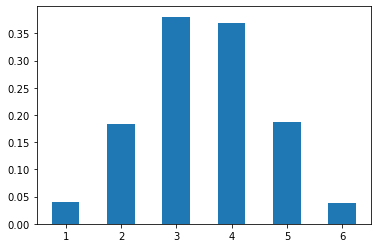

In [89]:
np.random.seed(344)
# Graficar el histograma de 1000 lanazamientos del dado

# Ejercicio

Estimar el valor de $\pi$ en base a la siguiente figura:
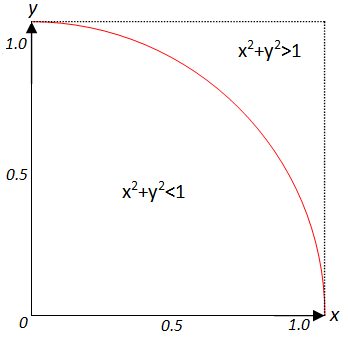

In [55]:
# Solución


# Tarea

# 1
Como ejemplo simple de una simulación de Monte Carlo, considere calcular la probabilidad de una suma particular del lanzamiento de tres dados (cada dado tiene valores del uno al seis). Además cada dado tiene las siguientes carácterísticas: el primer dado no está cargado (distribución uniforme todos son equiprobables); el segundo y tercer dado están cargados basados en una distribución binomial con parámetros (`n=5, p=0.5` y `n=5, p=0.2`). Calcule la probabilidad de que la suma resultante sea 7, 14 o 18. 

In [53]:
# Solución


(0.127, 0.01352, 1e-05)

# 2 Ejercicio de juego

En un casino, un jugador está jugando a lanzar un dado justo de 6 caras. Si el jugador lanza un número par, el casino paga $\$1$ al jugador, de lo contrario, el jugador paga $\$1$ al casino. El jugador decide jugar 100 veces.

1. ¿Cuál es la probabilidad de que un jugador gane dinero después de 100 lanzamientos del dado bajo las reglas del juego (el casino paga $\$1$ si el resultado es par y el jugador paga $\$1$ si es impar)?

2. ¿Cómo afectaría el cambio en las reglas del juego (por ejemplo, el casino paga $\$2$ si el resultado es par y el jugador paga $\$1$ si es impar) a la ganancia esperada para el jugador después de 100 lanzamientos?

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>